# SF Crime Data Model Iteration 1
### Keenan and Joe


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing
from sklearn.metrics import log_loss
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
import numpy as np
 
%matplotlib inline

#Load Data with pandas, and parse the first column into datetime
train=pd.read_csv('train.csv', parse_dates = ['Dates'])
test=pd.read_csv('test.csv', parse_dates = ['Dates'])

train.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


After accumulating all of the data, we begin to do some processing. The biggest challenge facing this dataset is that many of the catagories of data are not numerical, but do not have clear scales between them. Instead of just turning them into numbers, like monday 1, tuesday 2, etc, it makes more sense to binarize the data so they have the same scale. Pandas has a great function called get_dummies which does exactly that!

In [26]:
#Convert crime labels to numbers
le_crime = preprocessing.LabelEncoder()
crime = le_crime.fit_transform(train.Category)
 
#Get binarized weekdays, districts, and hours.
days = pd.get_dummies(train.DayOfWeek)
district = pd.get_dummies(train.PdDistrict)
hour = train.Dates.dt.hour
hour = pd.get_dummies(hour) 
 
#Build new array
train_data = pd.concat([hour, days, district], axis=1)
train_data['crime']=crime
 
#Repeat for test data
days = pd.get_dummies(test.DayOfWeek)
district = pd.get_dummies(test.PdDistrict)
 
hour = test.Dates.dt.hour
hour = pd.get_dummies(hour) 
 
test_data = pd.concat([hour, days, district], axis=1)
 
training, validation = train_test_split(train_data, train_size=.60)



After doing this for both the test and train data, we can begin to test out our data. I used a Logistic Regression after splitting the training data to have validation set to work with as well. 

In [27]:
features = ['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
 'Wednesday', 'BAYVIEW', 'CENTRAL', 'INGLESIDE', 'MISSION',
 'NORTHERN', 'PARK', 'RICHMOND', 'SOUTHERN', 'TARAVAL', 'TENDERLOIN']

features2 = [x for x in range(0,24)]
features = features + features2

training, validation = train_test_split(train_data, train_size=.60)
model = BernoulliNB()
model.fit(training[features], training['crime'])
predicted = np.array(model.predict_proba(validation[features]))
log_loss(validation['crime'], predicted) 
 
#Logistic Regression for comparison
model = LogisticRegression(C=.01)
model.fit(training[features], training['crime'])
predicted = np.array(model.predict_proba(validation[features]))
log_loss(validation['crime'], predicted) 

2.5906594356468409

In [28]:
model = BernoulliNB()
model.fit(train_data[features], train_data['crime'])
predicted = model.predict_proba(test_data[features])
 
#Write results
result=pd.DataFrame(predicted, columns=le_crime.classes_)
result.to_csv('testResult.csv', index = True, index_label = 'Id' )


I submitted this to kaggle and got a result of 2.58376, which was good enough for about 500th place out of 1250! 

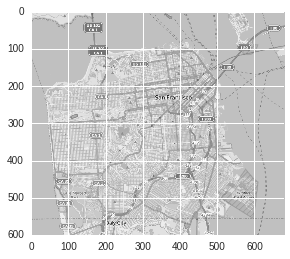

In [29]:
mapdata = np.loadtxt("./sf_map_copyright_openstreetmap_contributors.txt")
plt.imshow(mapdata, cmap = plt.get_cmap('gray'))
plt.show()

# OOH! LOOK AT THE PRETTY MAP OF SAN FRANCISCO! NOICE!